In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from utils import NoiadUtils
from solver import NoiadSolver, ParticleGenerator

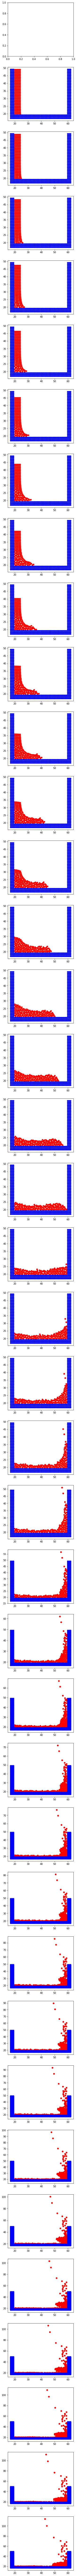

In [4]:
# full frame range
frameNumber = 1200

# generate particles
pg = ParticleGenerator()
pg.generateParticles()
pg.generateGround()

# prepare solver
solver = NoiadSolver()

# prepare figure
fig = plt.figure()
fig.set_figheight(5*int(frameNumber / 30))
fig.set_figwidth(5)
ax = fig.subplots(nrows=int(frameNumber / 30), ncols=1)

# generate scene file per frame
for t in range(1, frameNumber):
    
    for p in pg.particles:
        p.color.r = 0
        p.color.g = 0
        p.color.b = 0

    # add viscosity
    pg.particles = solver.addViscosityTerm(pg.particles)

    # add gravity
    pg.particles = solver.addGravityTerm(pg.particles)

    # move particles
    pg.particles = solver.moveParticle(pg.particles)

    # check collision
    pg.particles = solver.checkCollision(pg.particles)

    # calculate pressure value
    pg.particles = solver.calculateTemporaryPressure(pg.particles)

    # calculate pressure gradient
    pg.particles = solver.calculateModifiedAcceleration(pg.particles)

    # finalize particle position
    pg.particles = solver.finalizeParticlePosition(pg.particles)
    
    if t % 30 != 0:
        continue
    
    x = list()
    y = list()
    c = list()
    
    for p in pg.particles:
        x.append(p.position.x)
        y.append(p.position.y)
        if p.type == 1:
            c.append('b')
        else:
            c.append('r')

    row = ax[int(t / 30)]
    row.scatter(x, y, color=c)
                                                                                                                            
plt.show()